# Starbucks Project

The data set in this project contains simulated data that mimics customer behavior on the Starbucks rewards mobile app. Once every few days, Starbucks sends out an offer to users of the mobile app. An offer can be merely an advertisement for a drink or an actual offer such as a discount or BOGO (buy one get one free). Some users might not receive any offer during certain weeks. 

### There are 3 datasets used in this analysis,

1. portfolio - offer data
2. profile - demographic data
3. transcript - transactions by users towards an offer

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import math
import json
import matplotlib.pyplot as plt
%matplotlib inline

#Import data
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

In [2]:
portfolio

,channels,difficulty,duration,id,offer_type,reward
0,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10
1,"[web, email, mobile, social]",10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10
2,"[web, email, mobile]",0,4,3f207df678b143eea3cee63160fa8bed,informational,0
3,"[web, email, mobile]",5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5
4,"[web, email]",20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5
5,"[web, email, mobile, social]",7,7,2298d6c36e964ae4a3e7e9706d1fb8c2,discount,3
6,"[web, email, mobile, social]",10,10,fafdcd668e3743c1bb461111dcafc2a4,discount,2
7,"[email, mobile, social]",0,3,5a8bc65990b245e5a138643cd4eb9837,informational,0
8,"[web, email, mobile, social]",5,5,f19421c1d4aa40978ebb69ca19b0e20d,bogo,5
9,"[web, email, mobile]",10,7,2906b810c7d4411798c6938adc9daaa5,discount,2


In [3]:
profile.head()

,age,became_member_on,gender,id,income
0,118,20170212,None,68be06ca386d4c31939f3a4f0e3dd783,NaN
1,55,20170715,F,0610b486422d4921ae7d2bf64640c50b,112000.0
2,118,20180712,None,38fe809add3b4fcf9315a9694bb96ff5,NaN
3,75,20170509,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0
4,118,20170804,None,a03223e636434f42ac4c3df47e8bac43,NaN


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x120bb1ac8>,
      dtype=object)

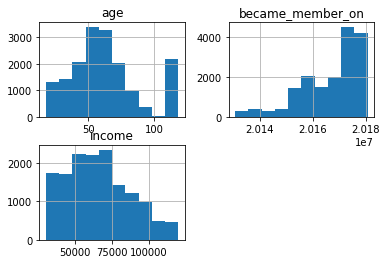

In [4]:
profile.hist()

In [5]:
transcript.head()

,event,person,time,value
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
2,offer received,e2127556f4f64592b11af22de27a7932,0,{'offer id': '2906b810c7d4411798c6938adc9daaa5'}
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}


In [6]:
#Splitiing the value column in transcript

transcript_value = transcript['value'].apply(pd.Series)

transcript = pd.concat([transcript, transcript_value], axis = 1).drop('value', axis = 1)

In [7]:
transcript.head()

,event,person,time,offer id,amount,offer_id,reward
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,NaN,NaN
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,NaN,NaN
2,offer received,e2127556f4f64592b11af22de27a7932,0,2906b810c7d4411798c6938adc9daaa5,NaN,NaN,NaN
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,fafdcd668e3743c1bb461111dcafc2a4,NaN,NaN,NaN
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,NaN,NaN


In [8]:
#Merging the transcripts and profile data

df = pd.merge(transcript, profile, left_on='person', right_on='id', how = 'left')

df.head()

,event,person,time,offer id,amount,offer_id,reward,age,became_member_on,gender,id,income
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,NaN,NaN,75,20170509,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,NaN,NaN,118,20170804,None,a03223e636434f42ac4c3df47e8bac43,NaN
2,offer received,e2127556f4f64592b11af22de27a7932,0,2906b810c7d4411798c6938adc9daaa5,NaN,NaN,NaN,68,20180426,M,e2127556f4f64592b11af22de27a7932,70000.0
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,fafdcd668e3743c1bb461111dcafc2a4,NaN,NaN,NaN,118,20170925,None,8ec6ce2a7e7949b1bf142def7d0e0586,NaN
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,NaN,NaN,118,20171002,None,68617ca6246f4fbc85e91a2a49552598,NaN


In [9]:
#Separating offer received, viewed, and completed

t_ov = df[df['event'] == 'offer viewed']

t_oc = df[df['event'] == 'offer completed']

df = df[df['event'] == 'offer received']

In [10]:
#Dropping duplicates

df = df.drop_duplicates()

t_ov = t_ov.drop_duplicates()

t_oc = t_oc.drop_duplicates()

In [11]:
#For every offer that was received, checking if the offer was completed

#Initializing offer completed column
df['offer completed'] = 0

def offer_complete_check(x):
    '''
    Description:
    Function to check if an offer that was received by a certain customer was completed
    
    INPUT:
    x - pandas dataframe that has the transaction info
    
    OUTPUT:
    1 - if the offer was completed
    0 - if the offer was not completed
    
    '''
    if t_oc[(t_oc['person'] == x['person']) & (t_oc['offer_id'] == x['offer id'])].shape[0] == 0:
        return 0
    else:
        return 1

#Apply the function to each offer that was received    
df['offer completed'] = df.apply(offer_complete_check, axis = 1)

In [12]:
#For every offer that was received, checking if the offer was completed

#Initializing offer viewed column
df['offer viewed'] = 0

def offer_view_check(x):
    '''
    Description:
    Function to check if an offer that was received by a certain customer was viewed
    
    INPUT:
    x - pandas dataframe that has the transaction info
    
    OUTPUT:
    1 - if the offer was viewed
    0 - if the offer was not viewed
    
    '''
    if t_ov[(t_ov['person'] == x['person']) & (t_ov['offer id'] == x['offer id'])].shape[0] == 0:
        return 0
    else:
        return 1
    
#Apply the function to each offer that was received    
df['offer viewed'] = df.apply(offer_view_check, axis = 1)

In [13]:
#Merging the transcript info with the portfolio data

df = pd.merge(df, portfolio, left_on='offer id', right_on='id', how = 'left')

df.head()

,event,person,time,offer id,amount,offer_id,reward_x,age,became_member_on,gender,id_x,income,offer completed,offer viewed,channels,difficulty,duration,id_y,offer_type,reward_y
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,NaN,NaN,75,20170509,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0,1,1,"[web, email, mobile]",5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,NaN,NaN,118,20170804,None,a03223e636434f42ac4c3df47e8bac43,NaN,0,1,"[web, email]",20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5
2,offer received,e2127556f4f64592b11af22de27a7932,0,2906b810c7d4411798c6938adc9daaa5,NaN,NaN,NaN,68,20180426,M,e2127556f4f64592b11af22de27a7932,70000.0,0,1,"[web, email, mobile]",10,7,2906b810c7d4411798c6938adc9daaa5,discount,2
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,fafdcd668e3743c1bb461111dcafc2a4,NaN,NaN,NaN,118,20170925,None,8ec6ce2a7e7949b1bf142def7d0e0586,NaN,0,1,"[web, email, mobile, social]",10,10,fafdcd668e3743c1bb461111dcafc2a4,discount,2
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,NaN,NaN,118,20171002,None,68617ca6246f4fbc85e91a2a49552598,NaN,0,1,"[web, email, mobile, social]",10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10


In [14]:
#Splitting the offer's channel data

#Initializing the 4 different channels
df['web'] = 0
df['email'] = 0
df['mobile'] = 0
df['social'] = 0

channels = ['web', 'email', 'mobile', 'social']

def ch_split(x):
    '''
    Description:
    Splitting the offer's channels in to their each binary column
    
    INPUT:
    x - pandas dataframe that has the transaction info
    
    OUTPUT:
    x - modified dataframe with binary values for each channel column
    
    '''
    channel_str = x['channels']
    for ch in channels:
        if ch in channel_str:
            x[ch] = 1
    return x

#Apply the function to each offer    
df = df.apply(ch_split, axis = 1)

In [15]:
#Drop unwanted columns
df = df.drop(columns = ['event', 'time', 'offer id', 'amount', 'offer_id', 'reward_x', 'id_x', 'id_y'])

df.head()

,person,age,became_member_on,gender,income,offer completed,offer viewed,channels,difficulty,duration,offer_type,reward_y,web,email,mobile,social
0,78afa995795e4d85b5d9ceeca43f5fef,75,20170509,F,100000.0,1,1,"[web, email, mobile]",5,7,bogo,5,1,1,1,0
1,a03223e636434f42ac4c3df47e8bac43,118,20170804,None,NaN,0,1,"[web, email]",20,10,discount,5,1,1,0,0
2,e2127556f4f64592b11af22de27a7932,68,20180426,M,70000.0,0,1,"[web, email, mobile]",10,7,discount,2,1,1,1,0
3,8ec6ce2a7e7949b1bf142def7d0e0586,118,20170925,None,NaN,0,1,"[web, email, mobile, social]",10,10,discount,2,1,1,1,1
4,68617ca6246f4fbc85e91a2a49552598,118,20171002,None,NaN,0,1,"[web, email, mobile, social]",10,5,bogo,10,1,1,1,1


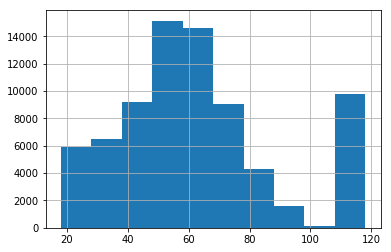

In [16]:
df['age'].hist()   

We see that there is a high number of customers in the profile data who are of age '118'

In [17]:
#Discarding the profiles with age = 118

df = df[df['age'] < 118]

In [18]:
#One hot encoding the offer_type and gender columns

df = pd.concat([df, pd.get_dummies(df['offer_type'])], axis = 1)

df = pd.concat([df, pd.get_dummies(df['gender'])], axis = 1)

In [19]:
#Drop unwanted columns

df = df.drop(columns = ['gender', 'offer_type', 'channels'])

df.head()

,person,age,became_member_on,income,offer completed,offer viewed,difficulty,duration,reward_y,web,email,mobile,social,bogo,discount,informational,F,M,O
0,78afa995795e4d85b5d9ceeca43f5fef,75,20170509,100000.0,1,1,5,7,5,1,1,1,0,1,0,0,1,0,0
2,e2127556f4f64592b11af22de27a7932,68,20180426,70000.0,0,1,10,7,2,1,1,1,0,0,1,0,0,1,0
5,389bc3fa690240e798340f5a15918d5c,65,20180209,53000.0,1,1,5,5,5,1,1,1,1,1,0,0,0,1,0
7,2eeac8d8feae4a8cad5a6af0499a211d,58,20171111,51000.0,0,0,0,4,0,1,1,1,0,0,0,1,0,1,0
8,aa4862eba776480b8bb9c68455b8c2e1,61,20170911,57000.0,0,1,20,10,5,1,1,0,0,0,1,0,1,0,0


In [20]:
#Convert became_member_on to datetime and then to integer

df['became_member_on'] = pd.to_datetime(df['became_member_on'], format='%Y%m%d').astype(int)

In [21]:
df.to_csv('df.csv')

In [22]:
import pandas as pd

df = pd.read_csv('df.csv')

In [23]:
df.head()

,Unnamed: 0,person,age,became_member_on,income,offer completed,offer viewed,difficulty,duration,reward_y,web,email,mobile,social,bogo,discount,informational,F,M,O
0,0,78afa995795e4d85b5d9ceeca43f5fef,75,1494288000000000000,100000.0,1,1,5,7,5,1,1,1,0,1,0,0,1,0,0
1,2,e2127556f4f64592b11af22de27a7932,68,1524700800000000000,70000.0,0,1,10,7,2,1,1,1,0,0,1,0,0,1,0
2,5,389bc3fa690240e798340f5a15918d5c,65,1518134400000000000,53000.0,1,1,5,5,5,1,1,1,1,1,0,0,0,1,0
3,7,2eeac8d8feae4a8cad5a6af0499a211d,58,1510358400000000000,51000.0,0,0,0,4,0,1,1,1,0,0,0,1,0,1,0
4,8,aa4862eba776480b8bb9c68455b8c2e1,61,1505088000000000000,57000.0,0,1,20,10,5,1,1,0,0,0,1,0,1,0,0


# 1. Can we reasonably predict whether or not someone will respond to an offer?

For this we will use Supervised Machine Learning models to predict if an offer that was viewed was completed or not.

In [24]:
#For the first question, we will only consider the transactions where the customer saw the offer
df_ov = df[df['offer viewed'] == 1].drop(columns = ['offer viewed', 'person'])

#Separating the data in to data and labels
y = df_ov['offer completed']
X = df_ov.drop(columns = ['offer completed'])

In [25]:
#Splitting the data in to training and testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)



In [26]:
#Scale the training data using a min max scaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

/Users/ar/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [27]:
#Import all ML models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [28]:
#Import Metrics
from sklearn.metrics import accuracy_score, fbeta_score

#List of Models
models = [DecisionTreeClassifier(random_state=42),
          AdaBoostClassifier(random_state=42),
          GradientBoostingClassifier(random_state=42),
          SGDClassifier(random_state=42),
          GaussianNB(),
          SVC(random_state=42)]

#List of model names
Model_Name = ['DecisionTreeClassifier',
              'AdaBoostClassifier',
              'GradientBoostingClassifier',
              'SGDClassifier',
              'GaussianNB',
              'SVC']

#Initalizing list of metrics
Training_Accuracy = []
Training_FBeta = []
Testing_Accuracy = []
Testing_FBeta = []
    
for model in models:
    
    #Train model
    model.fit(X_train, y_train)

    #Predict using model
    y_pred = model.predict(scaler.transform(X_test))
    
    #Predict training data
    y_train_pred = model.predict(X_train)
    
    #Append to metric lists
    Training_Accuracy.append(accuracy_score(y_train, y_train_pred))
    Training_FBeta.append(fbeta_score(y_train, y_train_pred, beta=0.5))
    Testing_Accuracy.append(accuracy_score(y_test, y_pred))
    Testing_FBeta.append(fbeta_score(y_test, y_pred, beta=0.5))

    

/Users/ar/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Users/ar/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


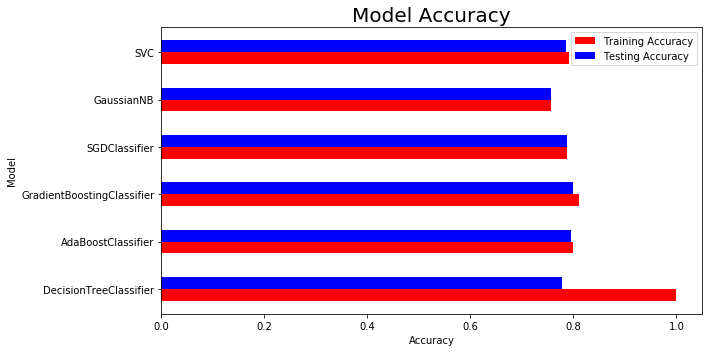

In [29]:
#Plot the accuracy for each model
fig, ax = plt.subplots(figsize=(10,5))
index = np.arange(len(Model_Name))
bar_width = 0.25

rects1 = plt.barh(index, Training_Accuracy, bar_width,  color='r', label='Training Accuracy')

rects2 = plt.barh(index + bar_width, Testing_Accuracy, bar_width, color='b', label='Testing Accuracy')

plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.title('Model Accuracy', fontsize=20)

y_labels = Model_Name

plt.yticks(index + bar_width/2, y_labels)

plt.legend()
plt.tight_layout()
plt.show()

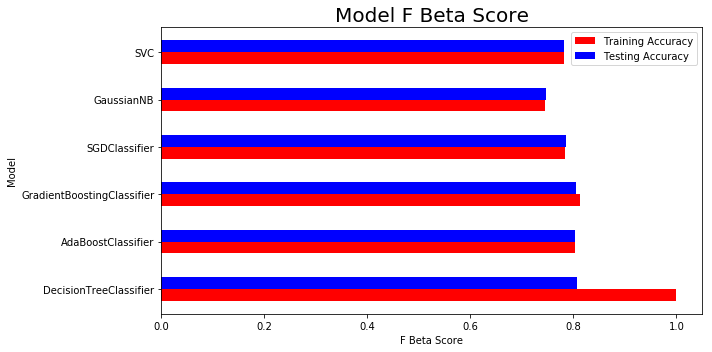

In [30]:
#Plot the accuracy for each model
fig, ax = plt.subplots(figsize=(10,5))
index = np.arange(len(Model_Name))
bar_width = 0.25

rects1 = plt.barh(index, Training_FBeta, bar_width,  color='r', label='Training Accuracy')

rects2 = plt.barh(index + bar_width, Testing_FBeta, bar_width, color='b', label='Testing Accuracy')

plt.xlabel('F Beta Score')
plt.ylabel('Model')
plt.title('Model F Beta Score', fontsize=20)

y_labels = Model_Name

plt.yticks(index + bar_width/2, y_labels)

plt.legend()
plt.tight_layout()
plt.show()

As we can see from the plots, the Decision Tree Classifier scores highest in both accuracy and F score, but it has perfect scores for both metrics on the training data. This probably means that Decision Tree Classifier is overfitting.

SGD, Gradient Boosting and SVC would be good choices to predict whether or not a person would respond to an offer.

# 2. What are the most predictive features in the data that helps us determine whether or not someone will respond to an offer??

For this, we will use GradientBoostingClassifier, train our model and check the feature importances

In [31]:
#Train the supervised model on the training set
model = GradientBoostingClassifier(random_state=42).fit(X_train, y_train)

#Extract the feature importances
importances = model.feature_importances_

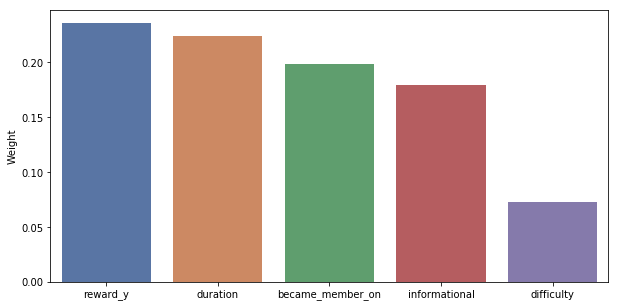

In [32]:
#Plot the feature importances
import seaborn as sns

importances = pd.DataFrame(importances, index = X.columns.values, columns = ["Weight"])

importances = importances.sort_values(by = "Weight", ascending = False)

plt.figure(figsize = (10, 5))

ax = sns.barplot(x = importances.index.values[:5] , y = importances["Weight"][:5], data=importances, palette="deep")

The top 5 features using the GradientBoostingClassifier are,
1. reward - The reward given for completing an offer
2. became_member_on - The date when customer created an app account
3. informational - The fact that the offer is informational
4. duration - The time for offer to be open
5. difficulty - The minimum required spend to complete an offer


# 3. Certain individuals do not need an offer sent to them to complete the conditions required on an offer. What are the characteristics of these customers?

We will refer to these customers as "Special Customers."

We will use Unsupervised Learning to cluster the customers.

In [33]:
#df = pd.read_csv('DF_2.csv')

#df = df[df['age'] < 118]

In [34]:
#Subset of transcript where customers completed the offer despite viewing the offer
df_2 = df[(df['offer completed'] == 1) & (df['offer viewed'] == 0)]

In [35]:
#Getting the number of times a customer completed an offer
df_2 = df_2.groupby('person').sum()['offer completed']

df_2.head()

person
0009655768c64bdeb2e877511632db8f    1
003d66b6608740288d6cc97a6903f4f0    1
004c5799adbf42868b9cff0396190900    1
005500a7188546ff8a767329a2f7c76a    1
0056df74b63b4298809f0b375a304cf4    1
Name: offer completed, dtype: int64

In [36]:
#Customers that have completed at least 2 offers without viewing it to make sure we exclude the one-off events
df_2 = df_2[df_2 > 1]

In [37]:
#List of target customers
special_customers = df_2.index.values.tolist()

In [38]:
#Cleaning the profile dataframe

#Excluding customers with age = 118
profile = profile[profile['age'] < 118]

#Changing the date to int
profile['became_member_on'] = pd.to_datetime(profile['became_member_on'], format='%Y%m%d').astype(int)

#one hot encoding gender column
profile = pd.concat([profile, pd.get_dummies(profile['gender'])], axis = 1).drop(columns = ['gender'])

In [39]:
#Getting details for the special customers
special_customers = profile[profile['id'].isin(special_customers)]

In [40]:
#All customers
profile = profile.drop(columns = ["id"])

#Special customers
special_customers = special_customers.drop(columns = ["id"])

In [41]:
#Standard scaling all customers dataset

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

profile_scaled = scaler.fit_transform(profile)

/Users/ar/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/ar/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [42]:
#Clustering in to 10 clusters

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 10, random_state = 0)

model = kmeans.fit(profile_scaled)

profile_clusters = model.predict(profile_scaled)

In [43]:
#Scaling, and clustering the special customers on the same models trained on all customers
special_customers_scaled = scaler.transform(special_customers)

special_customers_clusters = model.predict(special_customers_scaled)

/Users/ar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  


In [44]:
#Get cluster number and counts
profile_cluster_number, profile_count = np.unique(profile_clusters, return_counts=True)
special_cluster_number, special_count = np.unique(special_customers_clusters, return_counts=True)

#Make numpy array of cluster number and counts
np_profile = np.transpose([profile_cluster_number, profile_count.astype(float)])
np_special = np.transpose([special_cluster_number, special_count.astype(float)])

#Calculating proportions of the clusters
np_profile[:,1] = np_profile[:,1] / np.sum(np_profile[:,1])
np_special[:,1] = np_special[:,1] / np.sum(np_special[:,1])

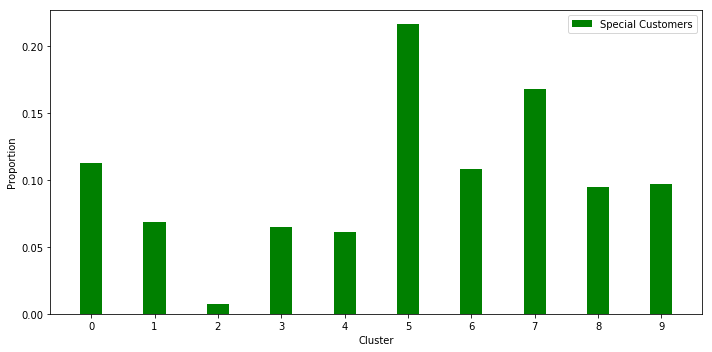

In [45]:
fig, ax = plt.subplots(figsize=(10,5))
index = np.arange(len(np_profile))
bar_width = 0.35

rects = plt.bar(index, np_special[:,1], bar_width, color='g', label='Special Customers')

plt.xlabel('Cluster')
plt.ylabel('Proportion')

x_labels = list(range(len(np_profile)))

plt.xticks(index, x_labels)

plt.legend()
plt.tight_layout()
plt.show()

Most of the special customers are in Cluster 5. Let's look at cluster 5 more closely.

In [46]:
#Separating cluster 5 customers(OR) and the rest(UR)
profile_cluster_data = np.concatenate((profile_scaled, profile_clusters.reshape(profile_scaled.shape[0],1)), axis = 1)

profile_cluster_OR = profile_cluster_data[profile_cluster_data[:, profile_cluster_data.shape[1] - 1] == 5]
profile_cluster_UR = profile_cluster_data[profile_cluster_data[:, profile_cluster_data.shape[1] - 1] != 5]

profile_cluster_OR = profile_cluster_OR[:, 0:profile_cluster_data.shape[1]-1]
profile_cluster_UR = profile_cluster_UR[:, 0:profile_cluster_data.shape[1]-1]

special_OR = scaler.inverse_transform(profile_cluster_OR)
special_UR = scaler.inverse_transform(profile_cluster_UR)

special_OR = pd.DataFrame(special_OR, columns = profile.keys())
special_UR = pd.DataFrame(special_UR, columns = profile.keys())


In [47]:
#Fixing the data frames

special_OR['Gender'] = pd.Series(special_OR[['F', 'M', 'O']].columns[np.where(special_OR[['F', 'M', 'O']]!=0)[1]])

special_OR = special_OR.drop(columns = ['F', 'M', 'O'])

special_UR['Gender'] = pd.Series(special_UR[['F', 'M', 'O']].columns[np.where(special_UR[['F', 'M', 'O']]!=0)[1]])

special_UR = special_UR.drop(columns = ['F', 'M', 'O'])


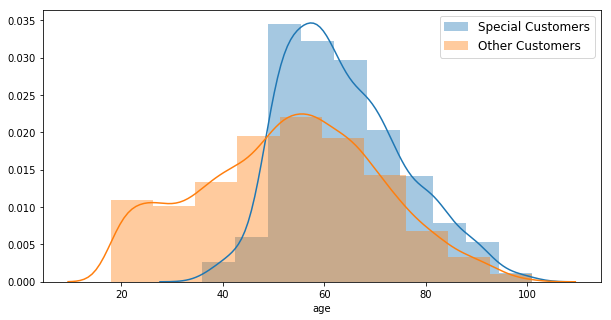

In [48]:
#Plotting the age comparisons of special customers and all customers
fig, ax = plt.subplots(figsize=(10,5))
sns.distplot(special_OR['age'], bins = 10, label='Special Customers')
sns.distplot(special_UR['age'], bins = 10, label='Other Customers')
plt.legend(prop={'size': 12});


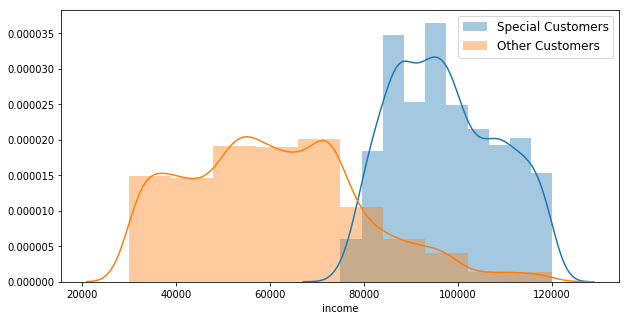

In [49]:
#Plotting the income comparisons of special customers and all customers
fig, ax = plt.subplots(figsize=(10,5))
sns.distplot(special_OR['income'], bins = 10, label='Special Customers')
sns.distplot(special_UR['income'], bins = 10, label='Other Customers')
plt.legend(prop={'size': 12});


The above plots show how the over represented cluster customers (who completed the offers without viewing the offer) compare against the rest of the customers.